Husam Muneeb
Yudai Shinkawa
Tommy Schmidt

In [ ]:
import math
import pandas_datareader as pdr
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import array

In [ ]:
# Get data from 2015 to present (In this case, Apple)
df = pdr.DataReader('AAPL', data_source='yahoo', start='2015-1-01', end='2020-12-09')
#df.to_csv('APPL.csv')
#df = pd.read_csv('APPL.csv')
# Get the head (beginning) data points and tall (ending)
df.head()
#df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.696352
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.000614
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.002876
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.339447
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.274624


In [ ]:
df1 = df.reset_index()['Close']
df1

0        27.332500
1        26.562500
2        26.565001
3        26.937500
4        27.972500
           ...    
1491    122.940002
1492    122.250000
1493    123.750000
1494    124.379997
1495    121.779999
Name: Close, Length: 1496, dtype: float64

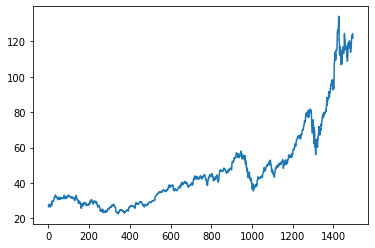

In [ ]:
# Shows the stock price from 2015 to 2020 (depending on where you want it to start.)
plt.plot(df1)

In [ ]:
# We need to convert the data into an array to create a usuable data.
# The stock data will reshape scale to fit from (0, 1)
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
df1

array([[0.04254224],
       [0.03564229],
       [0.0356647 ],
       ...,
       [0.90653709],
       [0.91218248],
       [0.88888396]])

In [ ]:
# We want to split the data set and "train" them.
# Ex. The data from day 2 is dependent on day 1 and day 3 is dependent on day 2, etc. 
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
# Get the data from index 0 to end of index from df1 for train_data and anything after should go into test_data
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1), :1]
#training_size, test_size
#train_data

In [ ]:
#len(train_data), len(test_data)

In [ ]:
# Convert the array into a dataset matrix.
def data_matrix(dataset, time_shift = 1):
	x_data, y_data = [], []
	for i in range(len(dataset) - time_shift - 1):
		a = dataset[i:(i + time_shift), 0]   # Whatever the time_shift is, x will have (time_shift - 1) values and y will have the value at time_shift
		x_data.append(a)
		y_data.append(dataset[i + time_shift, 0])
	return numpy.array(x_data), numpy.array(y_data)

In [ ]:
# Reshape each data point and shift by 1: x = t, t + 1, t + 2, t + 3...
time_shift = 100
x_train, y_train = data_matrix(train_data, time_shift)
x_test, y_test = data_matrix(test_data, time_shift)
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(871, 100)
(871,)
(423, 100)
(423,)


(None, None)

In [ ]:
# This will reshape the inputs since it is required for the LSTM model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] , 1)

In [ ]:
# This creates the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, validation_data = (x_test ,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 224ms/step - loss: 0.0062 - val_loss: 0.0622
Epoch 2/100
14/14 [==============================] - 2s 157ms/step - loss: 9.3748e-04 - val_loss: 0.0025
Epoch 3/100
14/14 [==============================] - 2s 157ms/step - loss: 3.0086e-04 - val_loss: 0.0046
Epoch 4/100
14/14 [==============================] - 2s 156ms/step - loss: 2.1186e-04 - val_loss: 0.0021
Epoch 5/100
14/14 [==============================] - 2s 159ms/step - loss: 2.0222e-04 - val_loss: 0.0027
Epoch 6/100
14/14 [==============================] - 2s 156ms/step - loss: 1.9151e-04 - val_loss: 0.0021
Epoch 7/100
14/14 [==============================] - 2s 160ms/step - loss: 1.8132e-04 - val_loss: 0.0029
Epoch 8/100
14/14 [==============================] - 2s 160ms/step - loss: 1.8310e-04 - val_loss: 0.0025
Epoch 9/100
14/14 [==============================] - 2s 159ms/step - loss: 1.7824e-04 - val_loss: 0.0038
Epoch 10/100
14/14 [==============================] - 2s 16

In [ ]:
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)


In [ ]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

In [ ]:
# Calculates the RMSE 
math.sqrt(mean_squared_error(y_train, train_prediction))

35.97636288591176

In [ ]:
# RMSE for test data.
math.sqrt(mean_squared_error(y_test, test_prediction))

76.74064276554729

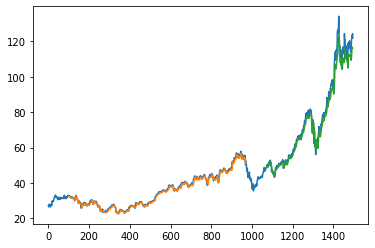

In [ ]:
# Plotting the graph
# shift train predictions for plots
look_back = 100
trainPredictionPlot = numpy.empty_like(df1)
trainPredictionPlot[:, :] = np.nan
trainPredictionPlot[look_back:len(train_prediction)+look_back, :] = train_prediction

# Shift the test predictions for plots
testPredictionPlot = numpy.empty_like(df1)
testPredictionPlot[:, :] = numpy.nan
testPredictionPlot[len(train_prediction)+(look_back*2) + 1:len(df1) -1, :] = test_prediction

# Plot the base graph, testing 
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictionPlot)
plt.plot(testPredictionPlot) 
plt.show()

# Green color is the test data. 
# Blue color is the entire graph
# Orange/brown color is the training data.

In [ ]:
# If we want to get the last 100 data points, subtract the len(test_data) by 100 and you want to change it, then subtract by x amount.
x_input=test_data[424:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
len(test_data)

524

In [ ]:
# I want to convert the numbers into the list.
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.6668309977063617,
 0.6692728553175609,
 0.629598155572658,
 0.6275371011334604,
 0.6472064395525556,
 0.6332497640148387,
 0.6492674939917532,
 0.6595726294541068,
 0.7498096496891122,
 0.7738026423638129,
 0.7803217602213007,
 0.7838837397660857,
 0.8182938527497715,
 0.793292791354934,
 0.8077647475941546,
 0.7777230691313635,
 0.8102962341027494,
 0.8282181850401235,
 0.827299676850565,
 0.8246113568632322,
 0.8331691048438642,
 0.8344684162054242,
 0.8574757644760412,
 0.9120929208963794,
 0.9254223308859609,
 0.9161701127758507,
 0.9313813877766558,
 0.9178279397269936,
 0.9160133476639299,
 0.9539405915602942,
 1.0,
 0.975088499135741,
 0.8808190672865533,
 0.8815359617320843,
 0.8085936268863175,
 0.848918016495409,
 0.8145974640423016,
 0.8012456297366669,
 0.8313545127808005,
 0.8329674910998369,
 0.802410531935542,
 0.7863703776425741,
 0.7550069635021696,
 0.7840405732448239,
 0.7995430225202348,
 0.7575160940615284,
 0.7673731534037207,
 0.8037546919292083,
 0.8277701089

In [ ]:
# This will predict the stock price for the next 30 days.
lst_output=[]
n_steps = 100
i = 0
while(i < 30):
    
    # Once there are 101 inputs, we will shift one position to the right and reshaping until it goes through 30 loops or 30 days.
    if(len(temp_input) > 100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input=x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i += 1
    # The 100 values in the list above are passed into the model and are starting the prediction.
    # The yhat value is added into the final value and in the previous input which results in 101 inputs.
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1
    

print(lst_output)

[0.8336103]
101
1 day input [0.66927286 0.62959816 0.6275371  0.64720644 0.63324976 0.64926749
 0.65957263 0.74980965 0.77380264 0.78032176 0.78388374 0.81829385
 0.79329279 0.80776475 0.77772307 0.81029623 0.82821819 0.82729968
 0.82461136 0.8331691  0.83446842 0.85747576 0.91209292 0.92542233
 0.91617011 0.93138139 0.91782794 0.91601335 0.95394059 1.
 0.9750885  0.88081907 0.88153596 0.80859363 0.84891802 0.81459746
 0.80124563 0.83135451 0.83296749 0.80241053 0.78637038 0.75500696
 0.78404057 0.79954302 0.75751609 0.76737315 0.80375469 0.82777011
 0.81997404 0.83538692 0.84416871 0.81038579 0.84157002 0.81164039
 0.82884545 0.82785974 0.84578169 0.91236174 0.88279049 0.88359702
 0.87929572 0.86415165 0.83691034 0.85062062 0.8448856  0.83484929
 0.828487   0.82857663 0.8424661  0.79407682 0.83099607 0.77310817
 0.77230165 0.78726653 0.82768048 0.86424128 0.86119458 0.83995704
 0.83682071 0.86836332 0.86585425 0.86630233 0.87562175 0.86746723
 0.8552803  0.8607465  0.84909721 0.817823

In [ ]:
# In the test data we take the 100 indices in the days variable.
# And then read the next 30 indices to figure out the next 30 days.
days = np.arange(1,101)
predicted_days = np.arange(101,131)

In [ ]:
len(df1)

1496

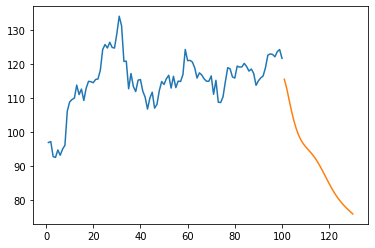

In [ ]:
# This number is 1396 because we are taking the last 100 days worth of data, so we subtract from the length of df1.
plt.plot(days,scaler.inverse_transform(df1[1396:]))
plt.plot(predicted_days,scaler.inverse_transform(lst_output))

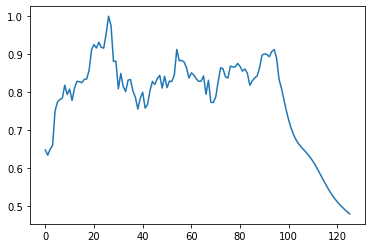

In [ ]:
# We combine the df1 chart to df3 to smoothen out the chart.
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1400:])

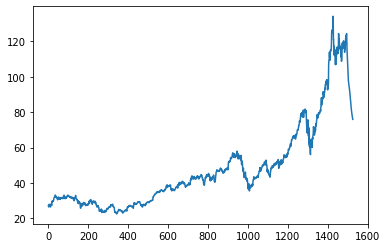

In [ ]:
# We transform it back to the original scaler data from 2015 to the present.
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)